### Data Cleaning

In [1]:
import pandas as pd
ratings = pd.read_csv('Data/ratings.csv')
movies = pd.read_csv('Data/movies.csv')
links = pd.read_csv('Data/links.csv')

In [2]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
movies.shape

(9742, 3)

In [4]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
ratings.shape

(100836, 4)

In [6]:
links.head(2)

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0


In [7]:
movies_ratings=ratings.join(movies.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [8]:
movies_ratings.head()

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [9]:
movies_ratings.shape

(100836, 6)

In [10]:
movies_ratings.isna().sum().sum()

0

In [11]:
movies_ratings_imdb=movies_ratings.join(links.set_index('movieId'), on='movieId', how='left', lsuffix='r')

In [12]:
movies_ratings_imdb.head()

,userId,movieId,rating,timestamp,title,genres,imdbId,tmdbId
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0


In [13]:
movies_ratings_imdb.shape

(100836, 8)

In [14]:
basics = pd.read_csv('Data/title.basics.tsv.gz', compression='gzip', sep='\t')

C:\Users\owner\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
basics.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [16]:
basics.shape

(7557513, 9)

In [17]:
crew = pd.read_csv('Data/title.crew.tsv.gz', compression='gzip', sep='\t')

In [18]:
crew.head()

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [19]:
crew.shape

(7557513, 3)

In [20]:
basics.rename(columns = {'tconst':'imdbId'}, inplace = True)
crew.rename(columns = {'tconst':'imdbId'}, inplace = True)

In [21]:
basics_crew=basics.join(crew.set_index('imdbId'), on='imdbId', how='inner', lsuffix='b')

In [22]:
basics_crew.head(2)

,imdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",nm0005690,\N
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",nm0721526,\N


In [23]:
basics_crew.imdbId=basics_crew.imdbId.map(lambda x: int(x.strip("tt")))

In [24]:
basics_crew.duplicated(subset='imdbId').sum()

0

In [25]:
combined=movies_ratings_imdb.join(basics_crew.set_index('imdbId'), on='imdbId', how='left', lsuffix='b')

In [26]:
combined.head()

,userId,movieId,rating,timestamp,title,genresb,imdbId,tmdbId,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,directors,writers
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,114709,862.0,movie,Toy Story,Toy Story,0,1995,\N,81,"Adventure,Animation,Comedy",nm0005124,"nm0005124,nm0230032,nm0004056,nm0710020,nm0923..."
1,1,3,4.0,964981247,Grumpier Old Men (1995),Comedy|Romance,113228,15602.0,movie,Grumpier Old Men,Grumpier Old Men,0,1995,\N,101,"Comedy,Romance",nm0222043,nm0425756
2,1,6,4.0,964982224,Heat (1995),Action|Crime|Thriller,113277,949.0,movie,Heat,Heat,0,1995,\N,170,"Crime,Drama,Thriller",nm0000520,nm0000520
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),Mystery|Thriller,114369,807.0,movie,Se7en,Se7en,0,1995,\N,127,"Crime,Drama,Mystery",nm0000399,nm0001825
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",Crime|Mystery|Thriller,114814,629.0,movie,The Usual Suspects,The Usual Suspects,0,1995,\N,106,"Crime,Mystery,Thriller",nm0001741,nm0003160


In [27]:
combined.shape

(100836, 18)

In [28]:
condensed=combined.drop(columns=['genres','writers','timestamp','imdbId','tmdbId','titleType','primaryTitle','originalTitle','isAdult','endYear'])

In [29]:
condensed.head(2)

,userId,movieId,rating,title,genresb,startYear,runtimeMinutes,directors
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995,81,nm0005124
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance,1995,101,nm0222043


In [30]:
condensed.dropna(inplace=True)

In [31]:
for column in condensed.columns:
     print("\n" + column)
     print(condensed[column].value_counts())


userId
414    2695
599    2475
474    2105
448    1861
274    1345
       ... 
595      20
569      20
431      20
442      20
576      19
Name: userId, Length: 610, dtype: int64

movieId
356       329
318       317
296       307
593       279
2571      278
         ... 
153386      1
57147       1
5986        1
100304      1
8196        1
Name: movieId, Length: 9707, dtype: int64

rating
4.0    26803
3.0    20035
5.0    13196
3.5    13125
4.5     8546
2.0     7545
2.5     5550
1.0     2809
1.5     1791
0.5     1365
Name: rating, dtype: int64

title
Forrest Gump (1994)                                           329
Shawshank Redemption, The (1994)                              317
Pulp Fiction (1994)                                           307
Silence of the Lambs, The (1991)                              279
Matrix, The (1999)                                            278
                                                             ... 
Into the Forest of Fireflies' Light (2011)     

In [32]:
condensed['startYear']=condensed['startYear'].astype(float)

In [33]:
condensed=condensed[condensed['runtimeMinutes']!='\\N']

In [34]:
condensed['runtimeMinutes']=condensed['runtimeMinutes'].astype(float)

In [35]:
condensed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100760 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userId          100760 non-null  int64  
 1   movieId         100760 non-null  int64  
 2   rating          100760 non-null  float64
 3   title           100760 non-null  object 
 4   genresb         100760 non-null  object 
 5   startYear       100760 non-null  float64
 6   runtimeMinutes  100760 non-null  float64
 7   directors       100760 non-null  object 
dtypes: float64(3), int64(2), object(3)
memory usage: 6.9+ MB


### EDA

In [36]:
eda_df=condensed

In [37]:
genres = set()
for genre_string in eda_df['genresb']:
   genre_list = genre_string.split('|')
   for genre in genre_list:
       genres.add(genre)
genres = list(genres)

In [38]:
for g in genres:
    eda_df[g]=eda_df['genresb'].apply(lambda x: 1 if g in x else 0)
    #Last line converts Trues to 1 and Falses to 0 for the genres.

In [39]:
eda_df.drop('genresb',axis=1,inplace=True)

In [40]:
eda_df.head(2)

,userId,movieId,rating,title,startYear,runtimeMinutes,directors,IMAX,Adventure,Sci-Fi,...,Western,Comedy,Crime,Romance,Thriller,Horror,Film-Noir,Musical,Documentary,War
0,1,1,4.0,Toy Story (1995),1995.0,81.0,nm0005124,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,1,3,4.0,Grumpier Old Men (1995),1995.0,101.0,nm0222043,0,0,0,...,0,1,0,1,0,0,0,0,0,0


In [41]:
def rating_by_genre(genre, df):
        try:
            return df.groupby(genre).median()["rating"].loc[1]
        except KeyError:
            return None

In [42]:
genre_names = ['Thriller', 'Documentary', 'IMAX', 'Animation', 'Romance',
       'War', 'Film-Noir', 'Crime', 'Mystery', 'Sci-Fi', '(no genres listed)',
       'Children', 'Adventure', 'Western', 'Musical', 'Fantasy', 'Comedy',
       'Drama', 'Horror', 'Action']

In [43]:
median_rating_genre = {}
for genre in genre_names:
    median_rating_genre[genre] = rating_by_genre(genre, eda_df)

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [45]:
palette = "YlGnBu"

In [46]:
sns.set_context("poster")

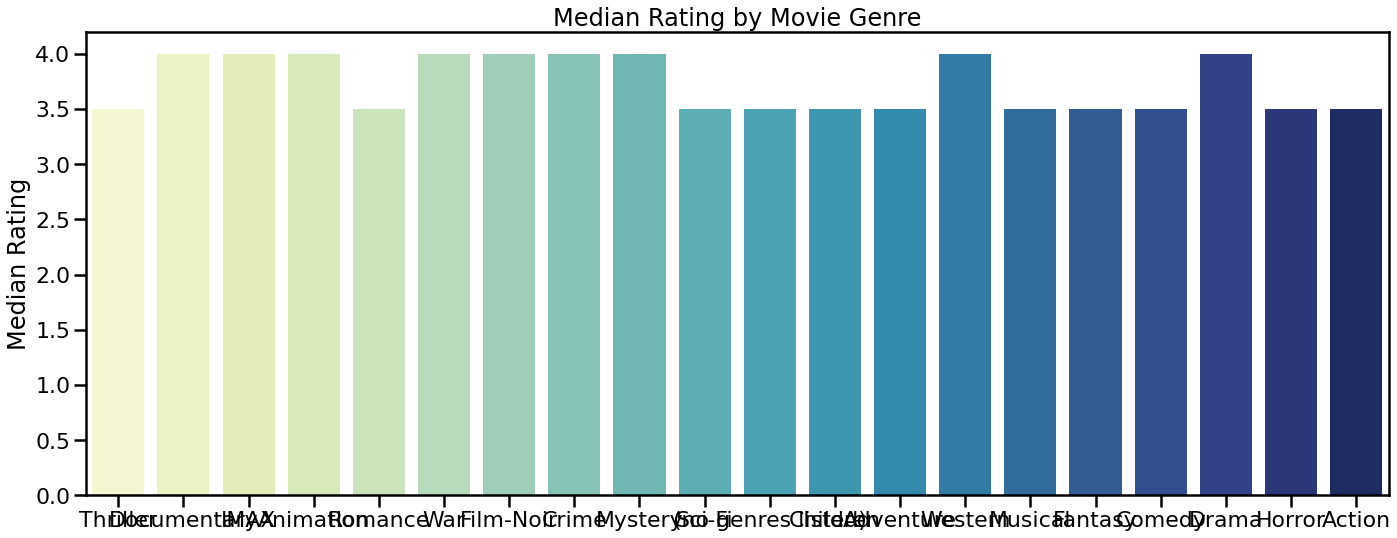

In [47]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
rating_plot = sns.barplot(x = list(median_rating_genre.keys()), y = list(median_rating_genre.values()), palette = palette, ax=ax)
rating_plot.set_title("Median Rating by Movie Genre")
rating_plot.set_ylabel("Median Rating")
plt.tight_layout()
plt.show()

In [48]:
subdf = eda_df.groupby(["rating"]).sum()
subdf.drop(columns = ["userId", "movieId", "startYear", "runtimeMinutes"], inplace=True)

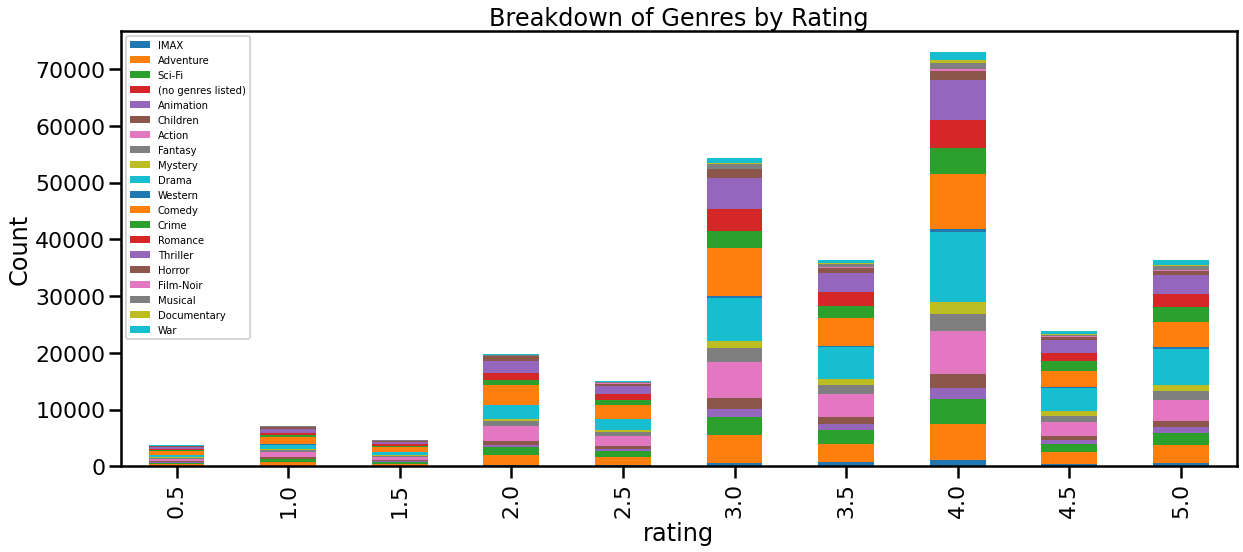

In [49]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 8)
subdf.plot.bar(stacked=True, ax=ax)
plt.legend(loc=2, prop={'size': 10})
plt.ylabel("Count")
plt.title("Breakdown of Genres by Rating")
plt.show()

In [50]:
import numpy as np

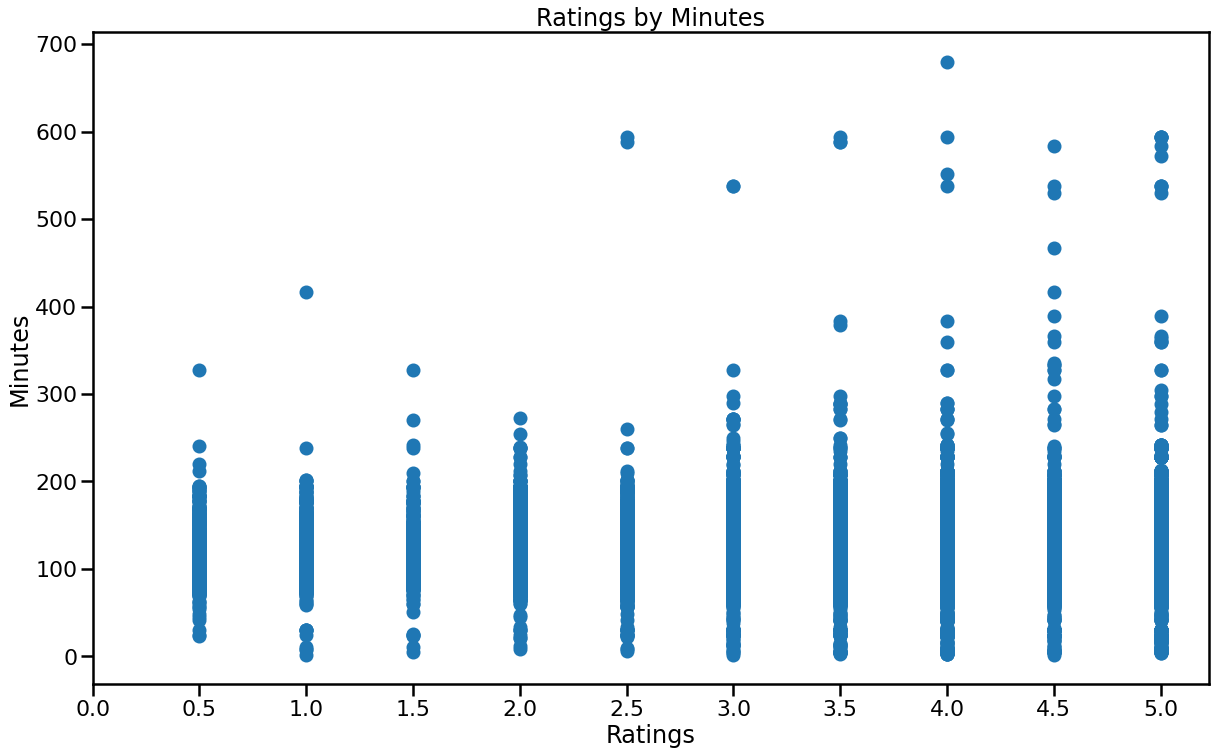

In [51]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 12)
plt.scatter(x=eda_df["rating"], y=eda_df["runtimeMinutes"])
plt.xticks(np.arange(0, 5.5, step=0.5))
plt.xlabel("Ratings")
plt.ylabel("Minutes")
plt.title("Ratings by Minutes")
plt.show()

In [52]:
subdf_year = eda_df.groupby("startYear").nunique()["movieId"]

In [53]:
subdf_year

startYear
1902.0      1
1903.0      1
1908.0      1
1915.0      1
1916.0      4
         ... 
2014.0    291
2015.0    269
2016.0    214
2017.0    144
2018.0     40
Name: movieId, Length: 106, dtype: int64

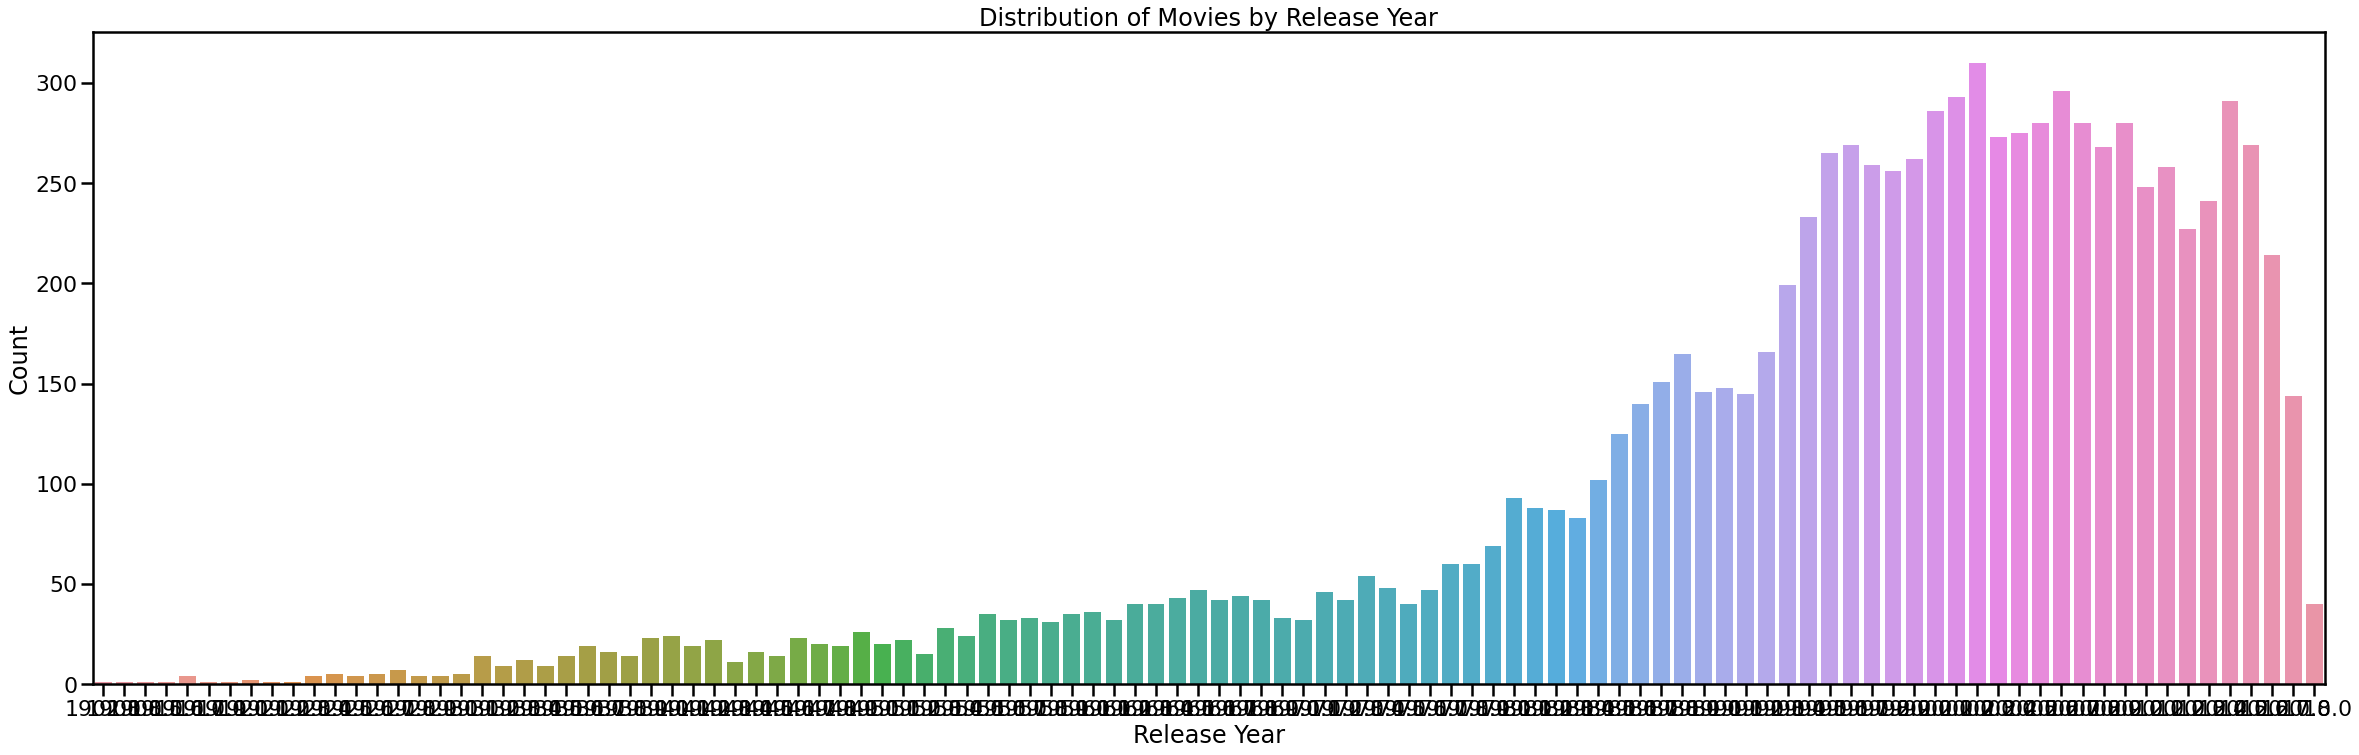

In [54]:
fig, ax = plt.subplots()
fig.set_size_inches(40, 12)
sns.barplot(x=subdf_year.index, y=subdf_year, ax=ax)
plt.xlabel("Release Year")
plt.ylabel("Count")
plt.title("Distribution of Movies by Release Year")
plt.show()

In [55]:
top_ten = list(pd.DataFrame(eda_df.groupby("movieId").mean()["rating"]).sort_values(by="rating", ascending=False)[:10].index)

In [56]:
low_count = eda_df.groupby("movieId").count().sort_values(by= "rating", ascending=True)
low_count

,userId,rating,title,startYear,runtimeMinutes,directors,IMAX,Adventure,Sci-Fi,(no genres listed),...,Western,Comedy,Crime,Romance,Thriller,Horror,Film-Noir,Musical,Documentary,War
movieId,,,,,,,,,,,,,,,,,,,,,
193609,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57502,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57499,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57421,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
57326,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2571,278,278,278,278,278,278,278,278,278,278,...,278,278,278,278,278,278,278,278,278,278
593,279,279,279,279,279,279,279,279,279,279,...,279,279,279,279,279,279,279,279,279,279
296,307,307,307,307,307,307,307,307,307,307,...,307,307,307,307,307,307,307,307,307,307


Potentially consider removing movies with low rating counts (over 6000 movies have less than 5 ratings)

### Data Preparation

In [57]:
preprocessed = condensed

In [58]:
preprocessed.drop(columns = "title", inplace=True)

In [59]:
directors = set()
for director_string in preprocessed['directors']:
   director_list = director_string.split(',')
   for director in director_list:
       directors.add(director)
directors = list(directors)

In [60]:
for d in directors:
    preprocessed[d]=preprocessed['directors'].apply(lambda x: 1 if g in x else 0)
    #Last line converts Trues to 1 and Falses to 0 for the directors.

In [61]:
preprocessed.drop(columns="directors", inplace=True)

In [62]:
preprocessed.head()

,userId,movieId,rating,startYear,runtimeMinutes,IMAX,Adventure,Sci-Fi,(no genres listed),Animation,...,nm1410815,nm1918140,nm1362570,nm0942869,nm0688913,nm0002196,nm0001627,nm0618779,nm0271402,nm0000570
0,1,1,4.0,1995.0,81.0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,3,4.0,1995.0,101.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,6,4.0,1995.0,170.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,47,5.0,1995.0,127.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,50,5.0,1995.0,106.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [63]:
features = preprocessed.drop(columns = ["userId", "movieId", "rating"])

#### PCA

In [64]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [65]:
scaler = StandardScaler()
features_transformed = scaler.fit_transform(features)

In [66]:
pca = PCA(n_components=21)
principalComponents = pca.fit_transform(features_transformed)

In [67]:
pca.explained_variance_ratio_.sum()

0.9845486319215339

In [68]:
components_df = pd.DataFrame(principalComponents, columns = ["PC " + str(num) for num in range(1, 22)])

### Modeling

#### Baseline Model with Surprise

In [70]:
from surprise import Reader, Dataset
from surprise.prediction_algorithms import KNNBaseline, KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
from surprise import accuracy

In [71]:
user_item = preprocessed[["userId", "movieId", "rating"]]

In [72]:
reader = Reader(rating_scale=(0.5, 5.5))
data = Dataset.load_from_df(user_item, reader)

Dataset has ratings from 610 viewers for 9703 movies total.

In [73]:
trainset, testset = train_test_split(data, test_size=0.2)

In [74]:
sim_cos = {'name':'cosine', 'user_based':True}

In [75]:
basic = KNNBasic(sim_options=sim_cos)
basic.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [76]:
base_test_preds = basic.test(testset)

In [77]:
accuracy.rmse(base_test_preds)

RMSE: 0.9816


0.9815883903771261

RMSE for baseline model is 0.97, meaning that on average the model's predictions for user ratings are 1 point off (on a scale of 0.5 - 5).

#### Modeling with LightFM

In [142]:
from lightfm.data import Dataset
from lightfm import LightFM

In [143]:
consolidated = pd.concat([user_item.reset_index(), components_df], axis=1)

In [144]:
consolidated.columns

Index(['index', 'userId', 'movieId', 'rating', 'PC 1', 'PC 2', 'PC 3', 'PC 4',
       'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12',
       'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20',
       'PC 21'],
      dtype='object')

In [145]:
ad_subset = consolidated[item_features]
ad_list = [tuple(x) for x in ad_subset.values]
ad_tuple = tuple(zip(consolidated['movieId'], ad_list))

In [150]:
ad_subset[:10]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21
0,5.214163,1.756811,-0.620852,1.160934,-0.701219,0.364557,0.141444,-0.023833,0.099381,-0.934154,...,-1.185932,-0.746607,-0.214384,0.372899,-0.707829,0.048174,0.424399,0.443661,-0.215139,0.534411
1,1.005180,-1.648006,0.057483,-1.543042,-0.361981,0.159208,-1.040837,0.511327,-0.092458,0.410462,...,0.240853,0.015856,0.821089,0.221710,-0.384968,0.465147,0.186285,0.215155,0.099050,-0.382856
2,-2.449824,0.948300,-0.377304,0.821673,-0.777748,1.392805,0.334547,-0.957759,0.065131,-0.137280,...,1.694345,-0.225763,0.497011,0.336005,0.181934,0.590806,0.729149,0.870000,1.035865,-0.094857
3,-1.580491,0.113041,-1.938924,1.010035,-0.036274,-0.802165,-0.385287,0.935087,-0.028308,-0.518653,...,-0.779163,-0.952574,1.674514,-1.780267,0.300196,0.146358,-0.654847,0.488028,0.632590,-0.642183
4,-1.923053,-0.018944,-3.001244,1.374812,-0.904420,0.325781,-0.069641,0.202185,0.014576,-0.609240,...,-0.149705,-0.658989,1.427279,-1.780363,-0.340834,0.105814,0.363553,-0.142555,-0.454611,-1.049851
5,-0.806494,0.664195,-1.995590,-1.670915,1.080178,-1.067296,-0.395971,-1.086012,0.111010,-0.807048,...,0.794149,1.236937,0.707180,1.202592,0.322372,0.789839,-0.497770,0.126936,0.531998,1.721702
6,0.861766,-0.684264,-0.316740,-1.023620,-1.174859,1.603945,-0.916907,0.161521,-0.067222,0.235125,...,0.840328,-0.229679,0.414022,0.180725,-0.589619,1.606662,0.785768,-0.554379,-2.162418,-0.819408
7,-2.015033,-0.466699,3.528160,1.562359,0.706023,-0.187446,0.660569,-1.172445,0.023379,0.606790,...,-0.822876,1.334748,1.597234,-0.053279,0.452203,-0.224037,0.487512,-0.233118,0.786238,0.308920
8,-1.265193,-1.283599,3.345200,0.965195,0.517748,-0.373765,-0.417966,-0.849966,-0.059647,1.152605,...,-0.695488,0.973687,2.645377,1.027011,-0.833523,-0.239576,0.609156,-0.872467,0.058886,-0.076572
9,0.402508,-1.381524,1.232145,-0.649410,0.641804,0.243417,0.628011,-1.019784,-0.009329,0.679162,...,-1.498428,2.216315,1.967774,-0.897476,-0.111793,-0.845873,-0.051462,0.436044,-0.923937,-0.758021


In [151]:
ad_list[:10]

[(5.214162927302881,
  1.7568110709362184,
  -0.620851919552495,
  1.1609337048924648,
  -0.7012192830586855,
  0.364557414842129,
  0.14144430737754593,
  -0.023832689799274467,
  0.0993807227756244,
  -0.9341540128924858,
  -1.6675390173516733,
  -1.1859321426720892,
  -0.7466071813973443,
  -0.21438441837993394,
  0.3728993997249834,
  -0.7078290485669853,
  0.04817368902335062,
  0.4243994812321728,
  0.44366138489540347,
  -0.21513853843611874,
  0.534411218704135),
 (1.0051801447760473,
  -1.6480058342824075,
  0.057483484470030176,
  -1.5430415014617687,
  -0.3619810167597979,
  0.15920796395367634,
  -1.0408365244973414,
  0.5113274531035825,
  -0.09245754505895817,
  0.4104622762262568,
  0.3625147473168754,
  0.24085305017360895,
  0.015855812879475684,
  0.8210891337440431,
  0.22170985562778814,
  -0.3849676384041391,
  0.46514718941059835,
  0.1862851179081182,
  0.21515488244304687,
  0.09905046441948824,
  -0.38285557276265064),
 (-2.4498237693881912,
  0.948300236879773

In [146]:
item_features=['PC 1', 'PC 2', 'PC 3', 'PC 4',
       'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12',
       'PC 13', 'PC 14', 'PC 15', 'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20',
       'PC 21']

In [160]:
data_fm = Dataset()
data_fm.fit((x['userId'].unique() for x in consolidated()), (x['movieId'] for x in consolidated()))


TypeError: 'DataFrame' object is not callable

In [136]:
#data_fm = Dataset()
#data_fm.fit(consolidated.userId.unique(), consolidated.movieId.unique(), item_features=item_features)


In [148]:
num_users, num_items = data_fm.interactions_shape()
print('Num users: {}, num_items {}.'.format(num_users, num_items))

Num users: 610, num_items 9703.


In [139]:
ad_tuple[:10]

((1,
  (5.214162927302881,
   1.7568110709362184,
   -0.620851919552495,
   1.1609337048924648,
   -0.7012192830586855,
   0.364557414842129,
   0.14144430737754593,
   -0.023832689799274467,
   0.0993807227756244,
   -0.9341540128924858,
   -1.6675390173516733,
   -1.1859321426720892,
   -0.7466071813973443,
   -0.21438441837993394,
   0.3728993997249834,
   -0.7078290485669853,
   0.04817368902335062,
   0.4243994812321728,
   0.44366138489540347,
   -0.21513853843611874,
   0.534411218704135)),
 (3,
  (1.0051801447760473,
   -1.6480058342824075,
   0.057483484470030176,
   -1.5430415014617687,
   -0.3619810167597979,
   0.15920796395367634,
   -1.0408365244973414,
   0.5113274531035825,
   -0.09245754505895817,
   0.4104622762262568,
   0.3625147473168754,
   0.24085305017360895,
   0.015855812879475684,
   0.8210891337440431,
   0.22170985562778814,
   -0.3849676384041391,
   0.46514718941059835,
   0.1862851179081182,
   0.21515488244304687,
   0.09905046441948824,
   -0.382855572

In [140]:
interactions_matrix, weights_matrix = data_fm.build_interactions([tuple(i) for i in user_item.values])

print(repr(interactions_matrix))

<610x9703 sparse matrix of type '<class 'numpy.int32'>'
	with 100760 stored elements in COOrdinate format>


In [92]:
consolidated.head()

,index,userId,movieId,rating,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,...,PC 12,PC 13,PC 14,PC 15,PC 16,PC 17,PC 18,PC 19,PC 20,PC 21
0,0,1,1,4.0,5.214163,1.756811,-0.620852,1.160934,-0.701219,0.364557,...,-1.185932,-0.746607,-0.214384,0.372899,-0.707829,0.048174,0.424399,0.443661,-0.215139,0.534411
1,1,1,3,4.0,1.005180,-1.648006,0.057483,-1.543042,-0.361981,0.159208,...,0.240853,0.015856,0.821089,0.221710,-0.384968,0.465147,0.186285,0.215155,0.099050,-0.382856
2,2,1,6,4.0,-2.449824,0.948300,-0.377304,0.821673,-0.777748,1.392805,...,1.694345,-0.225763,0.497011,0.336005,0.181934,0.590806,0.729149,0.870000,1.035865,-0.094857
3,3,1,47,5.0,-1.580491,0.113041,-1.938924,1.010035,-0.036274,-0.802165,...,-0.779163,-0.952574,1.674514,-1.780267,0.300196,0.146358,-0.654847,0.488028,0.632590,-0.642183
4,4,1,50,5.0,-1.923053,-0.018944,-3.001244,1.374812,-0.904420,0.325781,...,-0.149705,-0.658989,1.427279,-1.780363,-0.340834,0.105814,0.363553,-0.142555,-0.454611,-1.049851


In [84]:
movies_pc = consolidated.groupby("movieId").mean().drop(columns = ["index", "userId", "rating"], axis = 1).reset_index()

In [102]:
[(i[2], list(i[4:])) for i in consolidated.values]

[(1.0,
  [5.214162927302881,
   1.7568110709362184,
   -0.620851919552495,
   1.1609337048924648,
   -0.7012192830586855,
   0.364557414842129,
   0.14144430737754593,
   -0.023832689799274467,
   0.0993807227756244,
   -0.9341540128924858,
   -1.6675390173516733,
   -1.1859321426720892,
   -0.7466071813973443,
   -0.21438441837993394,
   0.3728993997249834,
   -0.7078290485669853,
   0.04817368902335062,
   0.4243994812321728,
   0.44366138489540347,
   -0.21513853843611874,
   0.534411218704135]),
 (3.0,
  [1.0051801447760473,
   -1.6480058342824075,
   0.057483484470030176,
   -1.5430415014617687,
   -0.3619810167597979,
   0.15920796395367634,
   -1.0408365244973414,
   0.5113274531035825,
   -0.09245754505895817,
   0.4104622762262568,
   0.3625147473168754,
   0.24085305017360895,
   0.015855812879475684,
   0.8210891337440431,
   0.22170985562778814,
   -0.3849676384041391,
   0.46514718941059835,
   0.1862851179081182,
   0.21515488244304687,
   0.09905046441948824,
   -0.38285

In [87]:
movies_pc.columns

Index(['movieId', 'PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7',
       'PC 8', 'PC 9', 'PC 10', 'PC 11', 'PC 12', 'PC 13', 'PC 14', 'PC 15',
       'PC 16', 'PC 17', 'PC 18', 'PC 19', 'PC 20', 'PC 21'],
      dtype='object')

In [159]:
item_features_list = data_fm.build_item_features(item_features)
print(repr(item_features))

ValueError: Expected tuples of (item_id, features), got PC 1.

In [149]:
#item_features = data_fm.build_item_features(ad_tuple)

#print(repr(item_features))

ValueError: Feature 5.214162927302881 not in feature mapping. Call fit first.

In [110]:
print(ad_tuple)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [111]:
ad_tuple[:10]

((1,
  [5.214162927302881,
   1.7568110709362184,
   -0.620851919552495,
   1.1609337048924648,
   -0.7012192830586855,
   0.364557414842129,
   0.14144430737754593,
   -0.023832689799274467,
   0.0993807227756244,
   -0.9341540128924858,
   -1.6675390173516733,
   -1.1859321426720892,
   -0.7466071813973443,
   -0.21438441837993394,
   0.3728993997249834,
   -0.7078290485669853,
   0.04817368902335062,
   0.4243994812321728,
   0.44366138489540347,
   -0.21513853843611874,
   0.534411218704135]),
 (3,
  [1.0051801447760473,
   -1.6480058342824075,
   0.057483484470030176,
   -1.5430415014617687,
   -0.3619810167597979,
   0.15920796395367634,
   -1.0408365244973414,
   0.5113274531035825,
   -0.09245754505895817,
   0.4104622762262568,
   0.3625147473168754,
   0.24085305017360895,
   0.015855812879475684,
   0.8210891337440431,
   0.22170985562778814,
   -0.3849676384041391,
   0.46514718941059835,
   0.1862851179081182,
   0.21515488244304687,
   0.09905046441948824,
   -0.382855572